<a href="https://colab.research.google.com/github/debarshee2004/machine_learning/blob/master/src/notebooks/06_binary_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting up the Dependencies.

In [1]:
# Importing dependencies
import tensorflow as tf
import os

In [2]:
# Avoid OOM Errors by setting GPU Memory Cpnsumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# Downloading the data from Kaggle.

In [3]:
from google.colab import files
files.upload()  # This will open a file uploader in your notebook.

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"debarsheechakraborty","key":"4c561bac51beb4cf4c292d909cb5c7f8"}'}

In [4]:
# Create a kaggle folder
! mkdir ~/.kaggle

In [5]:
# Copy the file to the folder
! cp kaggle.json ~/.kaggle/

In [7]:
!chmod 600 ~/.kaggle/kaggle.json
# Make sure the API token has the correct permissions. You can do this with the following commands

In [8]:
# Downloading the data the dataset
!kaggle datasets download -d playlist/men-women-classification

Dataset URL: https://www.kaggle.com/datasets/playlist/men-women-classification
License(s): copyright-authors
100% 1.18G/1.19G [01:03<00:00, 20.2MB/s]
100% 1.19G/1.19G [01:03<00:00, 20.1MB/s]


In [9]:
!ls

kaggle.json  men-women-classification.zip  sample_data


In [10]:
!unzip men-women-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/women/00000260.jpg  
  inflating: data/women/00000261.jpg  
  inflating: data/women/00000262.jpg  
  inflating: data/women/00000263.jpg  
  inflating: data/women/00000264.jpg  
  inflating: data/women/00000265.jpg  
  inflating: data/women/00000266.jpg  
  inflating: data/women/00000267.jpg  
  inflating: data/women/00000268.jpg  
  inflating: data/women/00000269.jpg  
  inflating: data/women/00000270.jpg  
  inflating: data/women/00000271.jpg  
  inflating: data/women/00000272.jpg  
  inflating: data/women/00000273.jpg  
  inflating: data/women/00000274.jpg  
  inflating: data/women/00000275.jpg  
  inflating: data/women/00000276.JPG  
  inflating: data/women/00000277.jpg  
  inflating: data/women/00000279.jpg  
  inflating: data/women/00000280.png  
  inflating: data/women/00000281.jpg  
  inflating: data/women/00000282.jpg  
  inflating: data/women/00000283.jpg  
  inflating: data/women/00000285.jpg  
  inflating: 

# Cleaning our data.

In [14]:
import cv2
import imghdr

In [15]:
data_dir = 'data'

In [16]:
image_dir = ['jpeg', 'jpg', 'bmp', 'png']

In [18]:
# Removes useless images
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_dir:
                print('Image not in list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in list data/women/00000631.jpg
Image not in list data/women/00000978.jpg
Image not in list data/women/00000736.jpg
Image not in list data/women/00001271.jpg
Image not in list data/women/missclassed (59).jpg
Image not in list data/women/00001188.jpg
Image not in list data/women/00001086.jpg
Image not in list data/women/00001756.jpg
Image not in list data/women/00000248.jpg
Image not in list data/women/00000086.jpg
Image not in list data/women/00001760.jpg
Image not in list data/women/00001462.gif
Image not in list data/women/00001502.jpg
Image not in list data/women/00002044.jpg
Image not in list data/women/02 (1).jpg
Image not in list data/women/00002387.jpg
Image not in list data/women/00002199.jpg
Image not in list data/women/00002224.jpg
Image not in list data/women/00001445.jpg
Image not in list data/women/00001364.jpg
Image not in list data/women/00001713.jpg
Image not in list data/women/00000041.jpg
Image not in list data/women/00001608.gif
Image not in list data/women

# Load Dataset

In [19]:
import numpy as np
from matplotlib import pyplot as plt

In [20]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 3172 files belonging to 2 classes.


In [21]:
data_iterator = data.as_numpy_iterator()

In [22]:
batch = data_iterator.next()

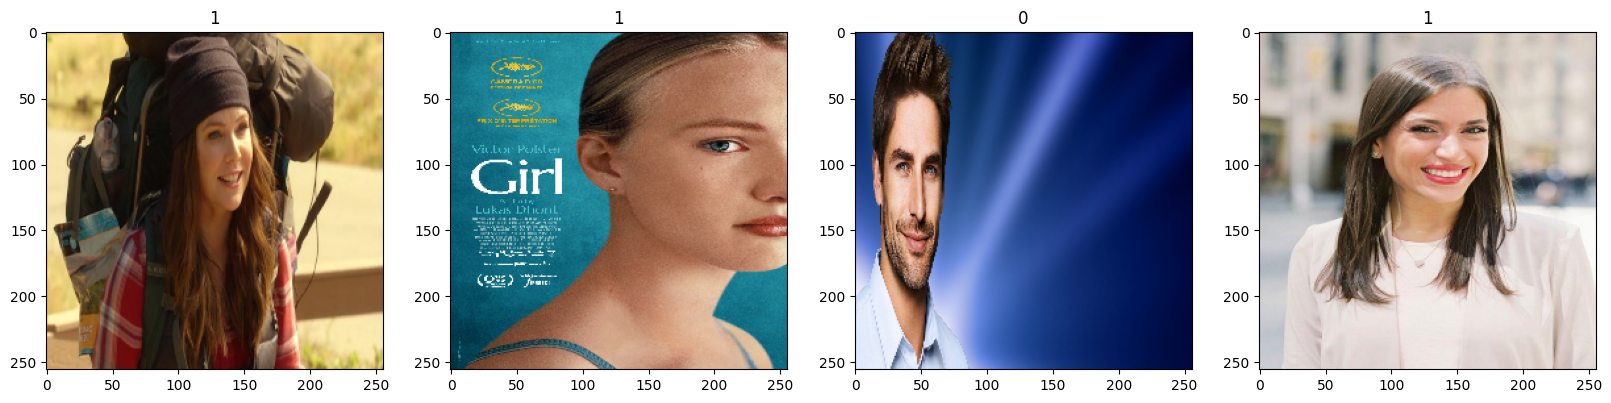

In [23]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

**Note:** <br/>
Class 0 - male <br/>
Class 1 - female


# Preprocess Data

In [24]:
# Scale Data
data = data.map(lambda x,y: (x/255, y))
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()

In [28]:
# Split Data
print(len(data))
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)
print(train_size, val_size, test_size)

100
70 20 10


In [29]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Deep Learning

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

**Model 01**

In [33]:
model01 = Sequential([
    Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)),
    MaxPooling2D(),
    Conv2D(32, (3,3), 1, activation='relu'),
    MaxPooling2D(),
    Conv2D(16, (3,3), 1, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [34]:
model01.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [35]:
model01.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

**Model 02**

In [49]:
model = Sequential([
    Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)),
    MaxPooling2D(),
    Conv2D(16, (3,3), 1, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)                   │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 125, 125, 16)        │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 62, 62, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 61504)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │      15,745,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,748,305 (60.08 MB)

 Trainable params: 15,748,305 (60.08 MB)

 Non-trainable params: 0 (0.00 B)

# Training the Model

In [50]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 41s 498ms/step - accuracy: 0.5531 - loss: 1.2517 - val_accuracy: 0.6313 - val_loss: 0.6413
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 36s 522ms/step - accuracy: 0.6402 - loss: 0.6345 - val_accuracy: 0.6469 - val_loss: 0.6402
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 36s 523ms/step - accuracy: 0.7463 - loss: 0.5203 - val_accuracy: 0.6828 - val_loss: 0.5859
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 35s 508ms/step - accuracy: 0.8738 - loss: 0.3316 - val_accuracy: 0.7281 - val_loss: 0.5660
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 38s 549ms/step - accuracy: 0.9440 - loss: 0.1844 - val_accuracy: 0.7141 - val_loss: 0.6736
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 57s 819ms/step - accuracy: 0.9756 - loss: 0.1135 - val_accuracy: 0.7109 - val_loss: 0.8324
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 36s 522ms/step - accuracy: 0.9943 - loss: 0.0577 - val_accuracy: 0.7422 - val_loss: 1.0304
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 38s 543ms/step - accuracy: 0.9917 - loss: 0.0431 - val_accu

# Ploting the Graphs

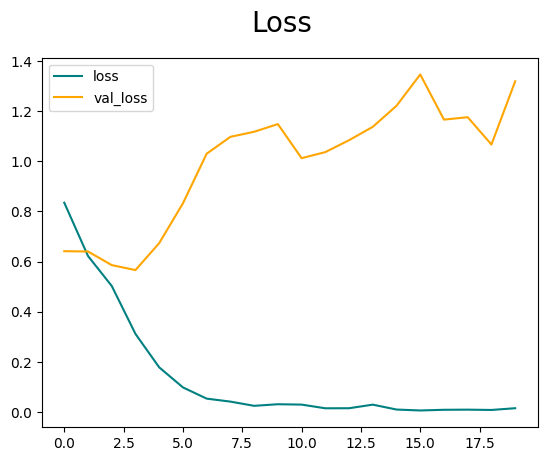

In [51]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

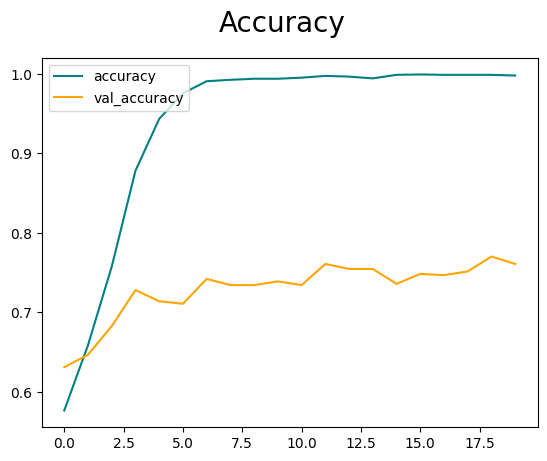

In [52]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluation

In [39]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

pre = Precision()
re = Recall()
acc = BinaryAccuracy()

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

print(pre.result(), re.result(), acc.result())

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 618ms/step
tf.Tensor(0.64327484, shape=(), dtype=float32) tf.Tensor(0.7096774, shape=(), dtype=float32) tf.Tensor(0.6369863, shape=(), dtype=float32)
